# Model validation altimetry

Note: this notebook requires the model output data

In [8]:
import modelskill as ms
import helper as h

In [ ]:
obs_fldr = "../observations/" 
mr_fldr = "../output_sample/"     # replace with "../output/" after download
mr_fn = f"{mr_fldr}Area.dfsu"

In [10]:
altlist = h.get_altimetry_obs(quality=None)

In [ ]:
mr = ms.DfsuModelResult(mr_fn, name="MIKE21", item=0)
mr

<DfsuModelResult>: MIKE21
Time: 2014-01-01 00:00:00 - 2023-12-31 23:00:00
Quantity: Surface Elevation [m]

In [16]:
cmps = []
for o in altlist:
    print(f"Processing {o.name}...")
    try:
        cmp = ms.match(obs=o.sel(time="2021"), mod=mr)
        cmps.append(cmp.remove_bias())
    except Exception as e:
        print(e)    
cc = ms.ComparerCollection(cmps)

Processing 3a...
Processing 3b...
Processing 6a...
"not all values found in index 'time'. Try setting the `method` keyword argument (example: method='nearest')."
Processing c2...
Processing j2...
Processing j3...
Processing sa...


In [18]:
cc.skill().round(4)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
3a,101,0.0,0.0765,0.0765,0.0609,0.9329,0.1555,0.7574
3b,50,-0.0,0.0588,0.0588,0.0468,0.9528,0.1393,0.9023
c2,45,0.0,0.0790,0.0790,0.0608,0.9178,0.2164,0.8416
j2,6,-0.0,0.0341,0.0341,0.0248,0.2254,0.0721,-1.5101
j3,121,-0.0,0.0703,0.0703,0.0504,0.9389,0.2083,0.8709
sa,42,-0.0,0.0945,0.0945,0.0764,0.8495,0.2312,0.6437


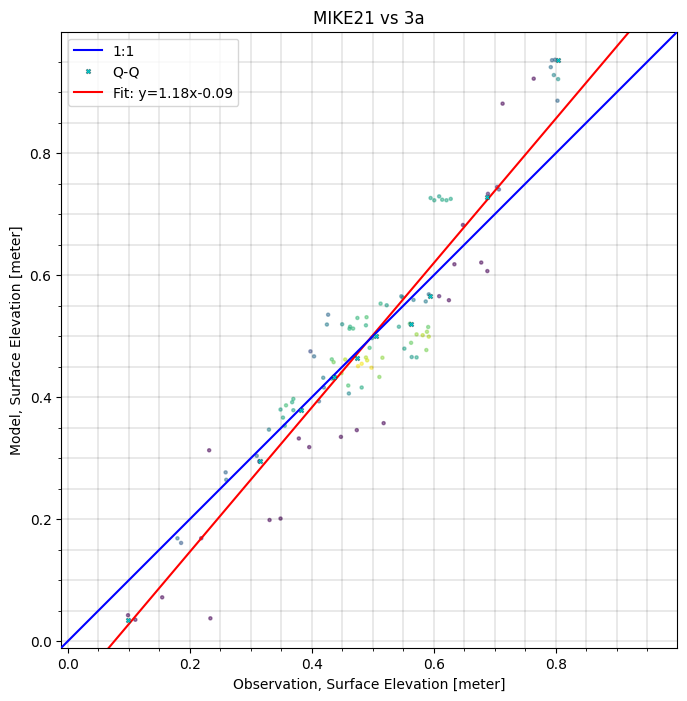

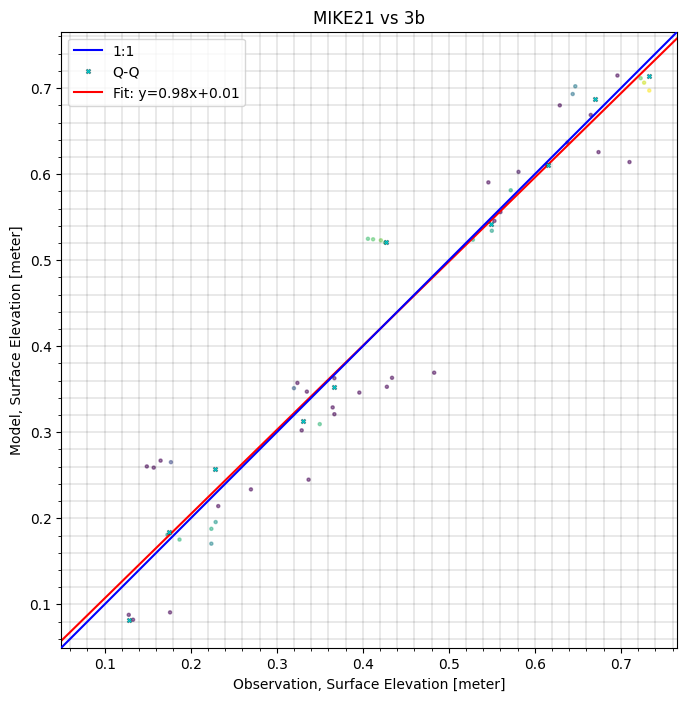

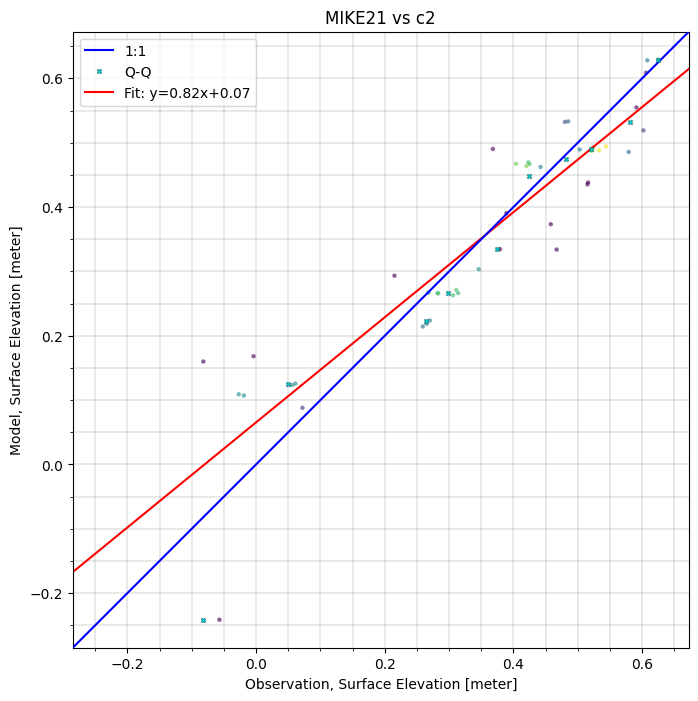

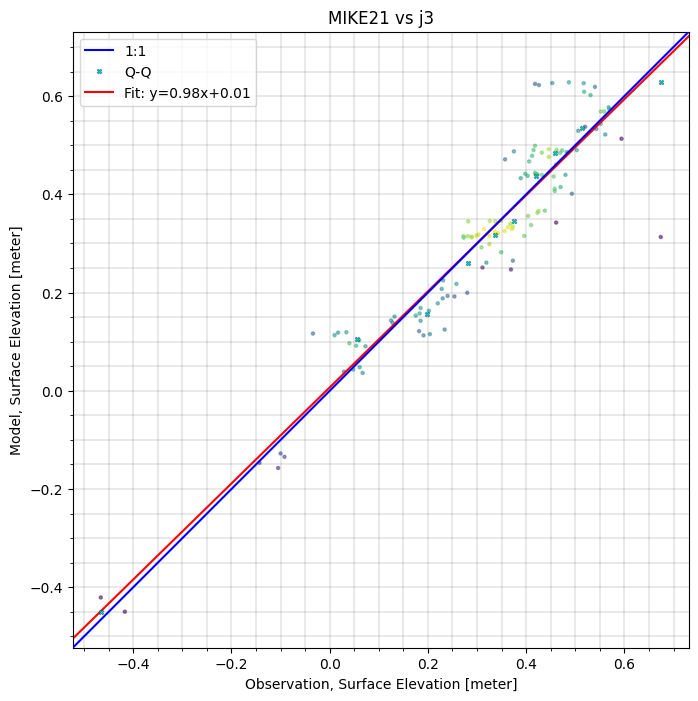

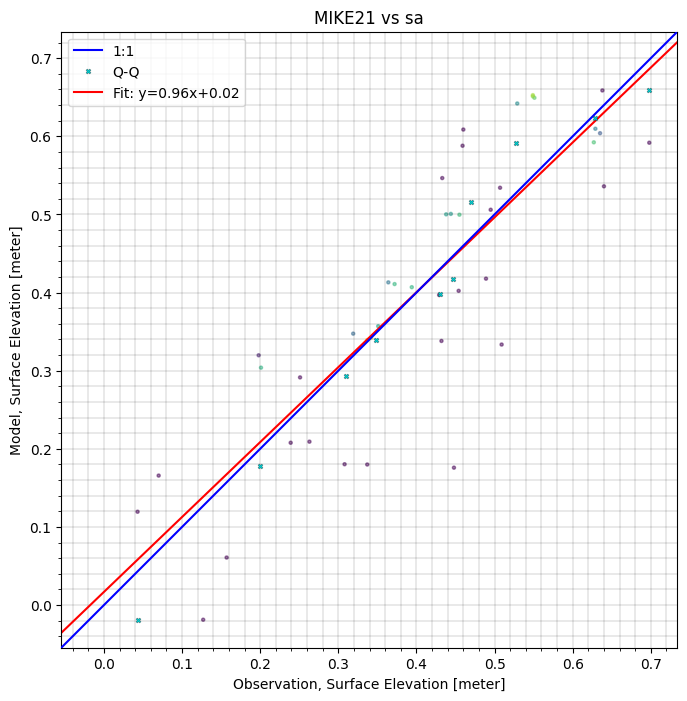

In [21]:
for cmp in cc:
    if cmp.n_points > 30:
        cmp.plot.scatter(bins=20)